## Group Project - Movie Rating Predictions

### 1. Choose a real-world dataset

##### About Dataset

https://www.kaggle.com/datasets/ashishkumarjayswal/movies-dataset?datasetId=3478473

###### Data is about 4000 movies with 17 columns which include: 
###### "movie_name";"rating_target_audience";"genre";"release_year";"release_date";"release_year_and_country";
###### "score";"votes";"director";"writer";"star";"country";"budget";"gross";"company";"runtime"


##### Import Libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

##### Load Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/GoldenSnow-Xue/schulich_data_science/main/MBAN%206110/Datasets/movies_data.csv')

In [4]:
df

,Unnamed: 0,movie_name,rating_target_audience,genre,release_year,release_date,release_year_and_country,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,The Shining,R,Drama,1980,June 13,1980 (United States),8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,1,The Blue Lagoon,R,Adventure,1980,July 2,1980 (United States),5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June 20,1980 (United States),8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,3,Airplane!,PG,Comedy,1980,July 2,1980 (United States),7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,4,Caddyshack,R,Comedy,1980,July 25,1980 (United States),7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,Birthday Girl,R,Comedy,2001,February 1,2002 (United States),6.1,25000.0,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000.0,16171098.0,FilmFour,93.0
3996,3996,Human Nature,R,Comedy,2001,September 12,2001 (France),6.4,18000.0,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0.0,1574660.0,Fine Line Features,96.0
3997,3997,Made,R,Comedy,2001,August 31,2001 (United States),6.4,18000.0,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000.0,5480653.0,Artisan Entertainment,95.0
3998,3998,One Night at McCool's,R,Comedy,2001,April 27,2001 (United States),6.1,29000.0,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000.0,13578186.0,October Films,93.0


In [5]:
df.describe()

,Unnamed: 0,release_year,score,votes,budget,gross,runtime
count,4000.000000,4000.000000,3947.000000,3.947000e+03,3.947000e+03,3.786000e+03,3940.000000
mean,1999.500000,1991.191500,6.318596,5.515430e+04,1.561524e+07,4.220456e+07,105.736294
std,1154.844867,5.934529,0.977161,1.436098e+05,2.257366e+07,9.303727e+07,18.546272
min,0.000000,1980.000000,2.200000,5.100000e+01,0.000000e+00,3.090000e+02,55.000000
25%,999.750000,1986.000000,5.700000,4.400000e+03,0.000000e+00,3.013546e+06,94.000000
50%,1999.500000,1991.000000,6.400000,1.400000e+04,7.500000e+06,1.221649e+07,102.000000
75%,2999.250000,1996.000000,7.000000,4.600000e+04,2.200000e+07,3.629985e+07,114.000000
max,3999.000000,2001.000000,9.300000,2.400000e+06,2.000000e+08,2.201647e+09,357.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4000 non-null   int64  
 1   movie_name                4000 non-null   object 
 2   rating_target_audience    3960 non-null   object 
 3   genre                     4000 non-null   object 
 4   release_year              4000 non-null   int64  
 5   release_date              4000 non-null   object 
 6   release_year_and_country  3947 non-null   object 
 7   score                     3947 non-null   float64
 8   votes                     3947 non-null   float64
 9   director                  3947 non-null   object 
 10  writer                    3947 non-null   object 
 11  star                      3946 non-null   object 
 12  country                   3947 non-null   object 
 13  budget                    3947 non-null   float64
 14  gross   

### 2. Define a Problem Statement and Hypothesis

### 3. Conduct Exploratory Data Analysis (EDA)

##### Data Cleaning

In [7]:
df = df.drop(columns=['Unnamed: 0', 'release_year_and_country'])

In [8]:
df = df.drop_duplicates()

##### Deal with missing values

In [9]:
df.isnull().sum()

movie_name                  0
rating_target_audience     40
genre                       0
release_year                0
release_date                0
score                      53
votes                      53
director                   53
writer                     53
star                       54
country                    53
budget                     53
gross                     214
company                    63
runtime                    60
dtype: int64

In [10]:
df['score'].fillna(df['score'].median(), inplace=True)
df['votes'].fillna(df['votes'].mean(), inplace=True)
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['gross'].fillna(df['gross'].mean(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

df['rating_target_audience'].fillna('other', inplace=True)
df['director'].fillna('other', inplace=True)
df['writer'].fillna('other', inplace=True)
df['star'].fillna('other', inplace=True)
df['country'].fillna('other', inplace=True)
df['company'].fillna('other', inplace=True)

In [11]:
df2 = df

In [12]:
df2.isnull().sum()

movie_name                0
rating_target_audience    0
genre                     0
release_year              0
release_date              0
score                     0
votes                     0
director                  0
writer                    0
star                      0
country                   0
budget                    0
gross                     0
company                   0
runtime                   0
dtype: int64

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_name              4000 non-null   object 
 1   rating_target_audience  4000 non-null   object 
 2   genre                   4000 non-null   object 
 3   release_year            4000 non-null   int64  
 4   release_date            4000 non-null   object 
 5   score                   4000 non-null   float64
 6   votes                   4000 non-null   float64
 7   director                4000 non-null   object 
 8   writer                  4000 non-null   object 
 9   star                    4000 non-null   object 
 10  country                 4000 non-null   object 
 11  budget                  4000 non-null   float64
 12  gross                   4000 non-null   float64
 13  company                 4000 non-null   object 
 14  runtime                 4000 non-null   

##### Deal with Outliers

###### rating_target_audience, genre, country don't have huge categories, so we decide to categorize them in feature engineering.

In [107]:
df2['rating_target_audience'].nunique(), df2['rating_target_audience'].unique(), df2['rating_target_audience'].value_counts()

(12,
 array(['R', 'PG', 'G', 'other', 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
        'PG-13', 'Unrated', 'X', 'TV-MA'], dtype=object),
 R            2043
 PG-13         848
 PG            815
 G             106
 Not Rated      92
 other          40
 Unrated        32
 NC-17          14
 TV-MA           4
 X               3
 TV-PG           2
 Approved        1
 Name: rating_target_audience, dtype: int64)

In [106]:
df2['genre'].nunique(), df2['genre'].unique(), df2['genre'].value_counts()

(17,
 array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
        'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
        'Music', 'Western', 'Thriller', 'History', 'Mystery'], dtype=object),
 Comedy       1355
 Drama         807
 Action        775
 Crime         302
 Adventure     231
 Biography     175
 Horror        158
 Animation     113
 Fantasy        33
 Mystery        13
 Thriller       11
 Romance         8
 Family          8
 Sci-Fi          6
 Western         3
 Music           1
 History         1
 Name: genre, dtype: int64)

In [102]:
df2['country'].nunique(), df2['country'].unique(), df2['country'].value_counts()

(45,
 array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
        'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'other',
        'France', 'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
        'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
        'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
        'Ireland', 'Denmark', 'Germany', 'Iran', 'China', 'Belgium',
        'Taiwan', 'Austria', 'Portugal', 'Vietnam',
        'Republic of Macedonia', 'Russia',
        'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
        'Norway', 'India', 'Jamaica', 'Aruba'], dtype=object),
 United States                     2952
 United Kingdom                     384
 France                             141
 Canada                              98
 other                               53
 Australia                           52
 Italy                               44
 Japan                               44
 Germany   

###### Director, wirter, star and company have a lot of categories with unique data, so we decide to drop them in data cleaning

In [105]:
df2['director'].nunique(), df2['director'].unique(), df2['director'].value_counts()

(1664,
 array(['Stanley Kubrick', 'Randal Kleiser', 'Irvin Kershner', ...,
        'Michel Gondry', 'Jon Favreau', 'Harald Zwart'], dtype=object),
 other                   53
 Woody Allen             22
 Clint Eastwood          16
 Barry Levinson          16
 Directors               16
                         ..
 John Patrick Shanley     1
 William Peter Blatty     1
 Jack Nicholson           1
 Hendel Butoy             1
 Harald Zwart             1
 Name: director, Length: 1664, dtype: int64)

In [104]:
df2['writer'].nunique(), df2['writer'].unique(), df2['writer'].value_counts()

(2660,
 array(['Stephen King', 'Henry De Vere Stacpoole', 'Leigh Brackett', ...,
        'Jennifer Jason Leigh', 'Tom Butterworth', 'Stan Seidel'],
       dtype=object),
 other              53
 Stephen King       27
 John Hughes        24
 Woody Allen        21
 David Mamet        13
                    ..
 James Bond III      1
 Michael Lehmann     1
 John McGreevey      1
 Massimo De Rita     1
 Stan Seidel         1
 Name: writer, Length: 2660, dtype: int64)

In [103]:
df2['star'].nunique(), df2['star'].unique(), df2['star'].value_counts()

(1627,
 array(['Jack Nicholson', 'Brooke Shields', 'Mark Hamill', ...,
        'Alan Cumming', 'Justin Chambers', 'Mekhi Phifer'], dtype=object),
 other             54
 Robert De Niro    27
 Mel Gibson        25
 Tom Hanks         24
 John Travolta     23
                   ..
 Carmen Maura       1
 Tami Erin          1
 Amanda Donohoe     1
 Doug Bradley       1
 Mekhi Phifer       1
 Name: star, Length: 1627, dtype: int64)

In [101]:
df2['company'].nunique(), df2['company'].unique(), df2['company'].value_counts()

(1281,
 array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
        'Noé Productions',
        'IMF Internationale Medien und Film GmbH & Co. Produktions KG',
        'Chickie the Cop'], dtype=object),
 Paramount Pictures       191
 Universal Pictures       191
 Columbia Pictures        174
 Warner Bros.             165
 Twentieth Century Fox    122
                         ... 
 Jascat                     1
 Cinema Group               1
 Mirabai Films              1
 Burrowes Film Group        1
 Chickie the Cop            1
 Name: company, Length: 1281, dtype: int64)

##### Data Visualization 

<module 'matplotlib.pyplot' from 'c:\\Users\\Golden Snow\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

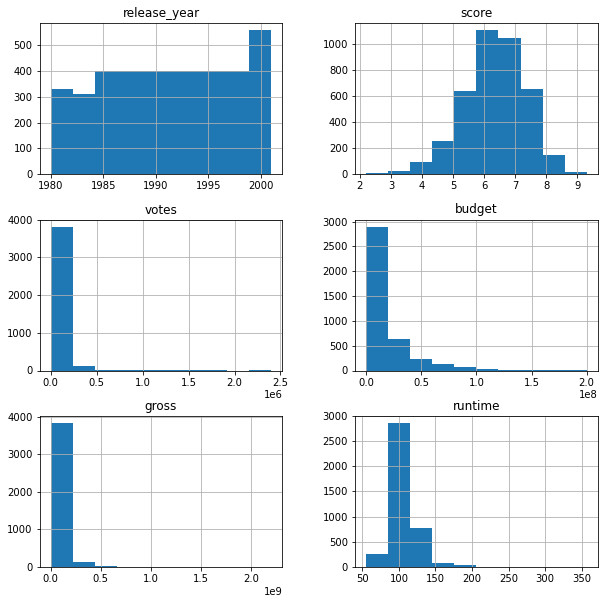

In [14]:
df2.hist(figsize=(10, 10))
plt

###### Most of the score are concentrated between 5 and 8

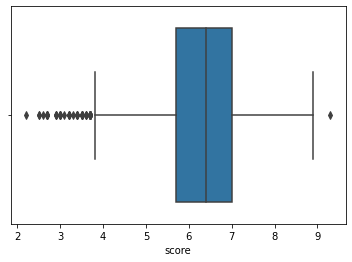

In [15]:
sns.boxplot(x='score', data=df2)
plt.show()

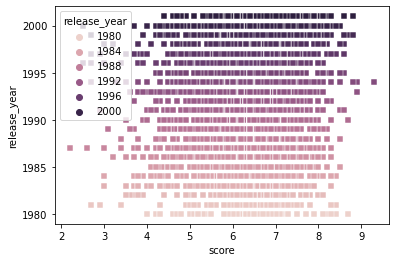

In [16]:
sns.scatterplot(x='score',
                y='release_year',
                data=df2,
                hue='release_year',
                marker='s')
plt.show()

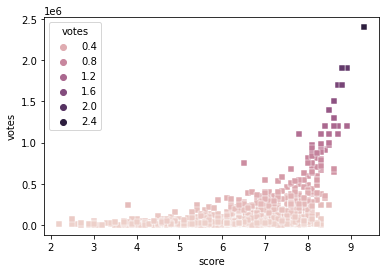

In [17]:
sns.scatterplot(x='score',
                y='votes',
                data=df2,
                hue='votes',
                marker='s')
plt.show()

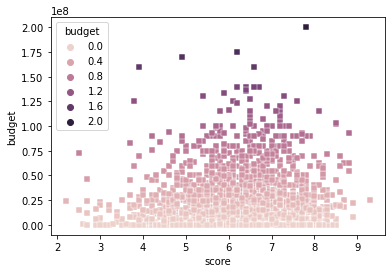

In [18]:
sns.scatterplot(x='score',
                y='budget',
                data=df2,
                hue='budget',
                marker='s')
plt.show()

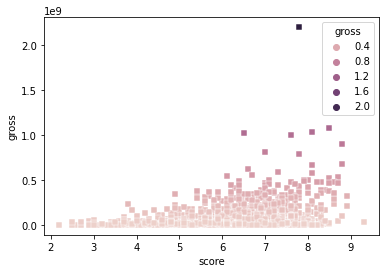

In [19]:
sns.scatterplot(x='score',
                y='gross',
                data=df2,
                hue='gross',
                marker='s')
plt.show()

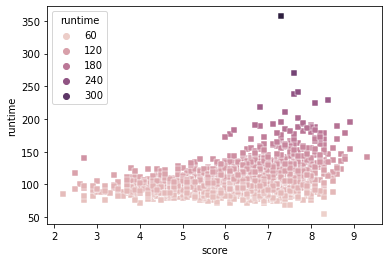

In [20]:
sns.scatterplot(x='score',
                y='runtime',
                data=df2,
                hue='runtime',
                marker='s')
plt.show()

<AxesSubplot:title={'center':'Directors with Top Revenue'}, ylabel='director'>

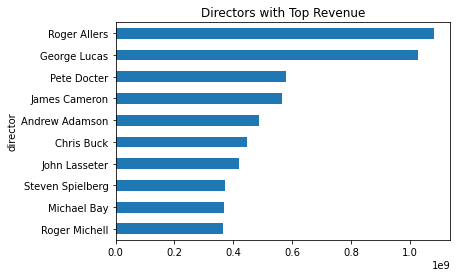

In [21]:
gross_of_director = df2.groupby('director').gross.mean()
gross_of_director.sort_values().tail(10).plot(kind = 'barh', title = 'Directors with Top Revenue')

<AxesSubplot:title={'center':'Directors with Top Revenue'}, ylabel='writer'>

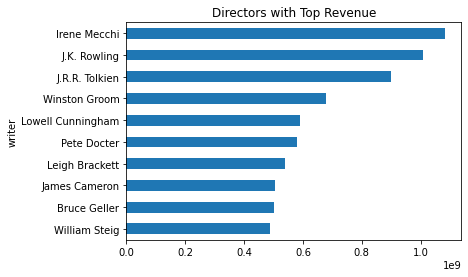

In [22]:
gross_of_writer = df2.groupby('writer').gross.mean()
gross_of_writer.sort_values().tail(10).plot(kind = 'barh', title = 'Directors with Top Revenue')

<AxesSubplot:title={'center':'Directors with Top Revenue'}, ylabel='star'>

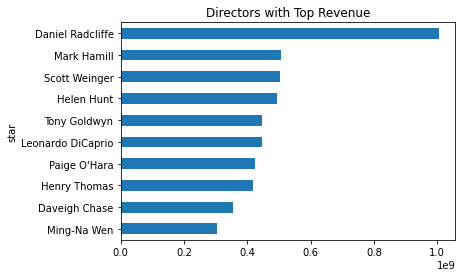

In [23]:
gross_of_star = df2.groupby('star').gross.mean()
gross_of_star.sort_values().tail(10).plot(kind = 'barh', title = 'Directors with Top Revenue')

<AxesSubplot:>

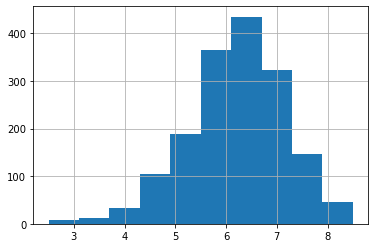

In [24]:
score_of_director = df2.groupby('director').score.mean()
score_of_director.hist()

<AxesSubplot:>

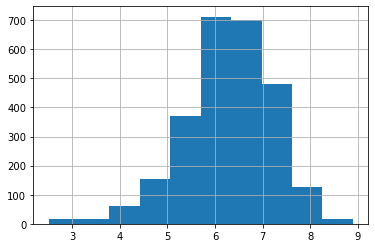

In [25]:
score_of_writer = df2.groupby('writer').score.mean()
score_of_writer.hist()

<AxesSubplot:>

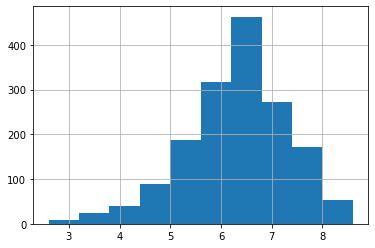

In [26]:
score_of_star = df2.groupby('star').score.mean()
score_of_star.hist()

##### Discriptive Statistics

In [69]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,4000.0,1.991191e+03,5.934529e+00,1980.0,1986.00,1991.0,1.996000e+03,2.001000e+03
score,4000.0,6.319675e+00,9.707090e-01,2.2,5.70,6.4,7.000000e+00,9.300000e+00
votes,4000.0,5.515430e+04,1.426550e+05,51.0,4500.00,14000.0,4.900000e+04,2.400000e+06
budget,4000.0,1.561524e+07,2.242358e+07,0.0,0.00,8000000.0,2.100000e+07,2.000000e+08
gross,4000.0,4.220456e+07,9.051367e+07,309.0,3367180.25,13794516.5,4.220456e+07,2.201647e+09
runtime,4000.0,1.057363e+02,1.840661e+01,55.0,94.00,102.0,1.130000e+02,3.570000e+02


In [27]:
# Measures of Central Tendency
mean = np.mean(df2)
mode = scipy.stats.mode(df2)

# Measures of Dispersion
variance = np.var(df2)
std_dev = np.std(df2)

print("Mean:", mean)
print("Mode:", mode.mode[0], "Count:", mode.count[0])   
print("Variance:", variance)  
print("Standard Deviation:", std_dev)   

Mean: release_year    1.991191e+03
score           6.319675e+00
votes           5.515430e+04
budget          1.561524e+07
gross           4.220456e+07
runtime         1.057363e+02
dtype: float64
Mode: ['Hamlet' 'R' 'Comedy' 1985 'December 25' 6.4 13000.0 'other' 'other'
 'other' 'United States' 0.0 42204563.659006864 'Paramount Pictures' 97.0] Count: [   3 2043 1355  200   49  228   82   53   53   54 2952 1353  214  191
  134]
Variance: release_year    3.520983e+01
score           9.420404e-01
votes           2.034537e+10
budget          5.026911e+14
gross           8.190677e+15
runtime         3.387188e+02
dtype: float64
Standard Deviation: release_year    5.933787e+00
score           9.705877e-01
votes           1.426372e+05
budget          2.242077e+07
gross           9.050236e+07
runtime         1.840431e+01
dtype: float64


c:\Users\Golden Snow\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Golden Snow\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3700: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\Golden Snow\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the re

###### Assess Linear Relationships

In [28]:
df.corr()['score'].sort_values(ascending=False)

score           1.000000
votes           0.391174
runtime         0.385150
gross           0.204789
release_year    0.083753
budget          0.030996
Name: score, dtype: float64

<AxesSubplot:>

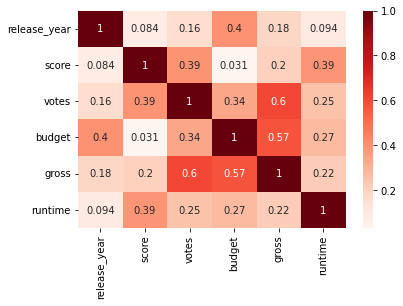

In [29]:
corr = df.corr().abs()
sns.heatmap(corr, cmap='Reds', annot=True)

### 4. Feature Engineering

In [30]:
df2.head()

,movie_name,rating_target_audience,genre,release_year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,June 13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,July 2,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June 20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,July 2,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,July 25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [31]:
df2.nunique()

movie_name                3971
rating_target_audience      12
genre                       17
release_year                22
release_date               407
score                       66
votes                      637
director                  1664
writer                    2660
star                      1627
country                     45
budget                     267
gross                     3781
company                   1281
runtime                    132
dtype: int64

In [32]:
df2['country'].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'other',
       'France', 'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Ireland', 'Denmark', 'Germany', 'Iran', 'China', 'Belgium',
       'Taiwan', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba'], dtype=object)

In [39]:
df['country'].nunique()

45

##### Categorize them based on their continents
Europe:
United Kingdom,
West Germany,
Italy,
Soviet Union,
France,
Sweden,
Spain,
Switzerland,
Netherlands,
Hungary,
Yugoslavia,
Ireland,
Denmark,
Germany,
Belgium,
Austria,
Portugal,
Republic of Macedonia,
Russia,
Federal Republic of Yugoslavia,
Greece,
Czech Republic,
Norway

North America: United States, Canada,
Jamaica,
Aruba

Oceania:
Australia,
New Zealand

Africa:
South Africa,
Libya

Asia:
Hong Kong,
South Korea,
Philippines,
Israel,
Japan,
Iran,
China,
Taiwan,
Vietnam,
India

South America:
Brazil,
Argentina

Other: 
other

In [50]:
Europe = ['United Kingdom', 'West Germany', 'Italy', 'Soviet Union', 'France', 'Sweden', 'Spain', 'Switzerland', 'Netherlands', 'Hungary', 'Yugoslavia', 'Ireland', 'Denmark', 'Germany', 'Belgium', 'Austria', 'Portugal', 'Republic of Macedonia', 'Russia', 'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic', 'Norway']
North_America = ['United States', 'Canada', 'Mexico', 'Jamaica', 'Aruba']
Africa = ['South Africa', 'Libya']
Oceania =['Australia', 'New Zealand']
Asia = ['Hong Kong', 'South Korea', 'Philippines', 'Israel', 'Japan', 'Iran', 'China', 'Taiwan', 'Vietnam', 'India']
South_America =['Brazil', 'Argentina']
Other = ['other']

In [51]:
# Create function to classify country
def continents(country):
    if country in Europe:
        return 'Europe'
    elif country in North_America:
        return 'North_America'
    elif country in Africa:
        return 'Africa'
    elif country in Oceania:
        return 'Oceania'
    elif country in Asia:
        return 'Asia'
    elif country in South_America:
        return 'South_America'
    else:
        return 'Other'

In [52]:
df2['continent'] = df2['country'].apply(continents)

In [53]:
df2

,movie_name,rating_target_audience,genre,release_year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime,continent
0,The Shining,R,Drama,1980,June 13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Europe
1,The Blue Lagoon,R,Adventure,1980,July 2,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,North_America
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June 20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,North_America
3,Airplane!,PG,Comedy,1980,July 2,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,North_America
4,Caddyshack,R,Comedy,1980,July 25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,North_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Birthday Girl,R,Comedy,2001,February 1,6.1,25000.0,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000.0,16171098.0,FilmFour,93.0,Europe
3996,Human Nature,R,Comedy,2001,September 12,6.4,18000.0,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0.0,1574660.0,Fine Line Features,96.0,Europe
3997,Made,R,Comedy,2001,August 31,6.4,18000.0,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000.0,5480653.0,Artisan Entertainment,95.0,North_America
3998,One Night at McCool's,R,Comedy,2001,April 27,6.1,29000.0,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000.0,13578186.0,October Films,93.0,North_America
